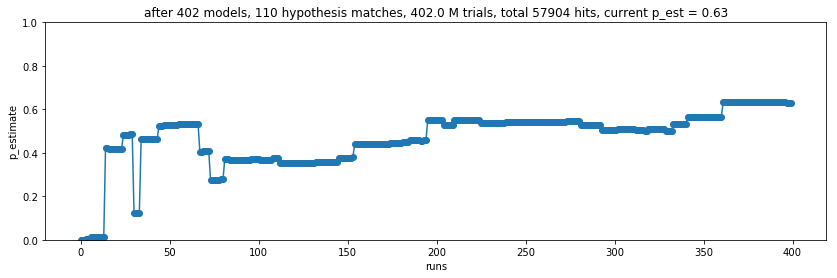

KeyboardInterrupt: 

In [16]:
from random import random
from numpy.random import multinomial
from matplotlib import pyplot as plt
from IPython.display import clear_output
%matplotlib inline

data = {
    'Carriage':  2,
    'Talabat':   2,
    'UberEats':  16,
    'Deliveroo': 12,
}

n_models = 1000
n_simulations = 1000*1000

def random_model(k):
    ps = [random() for _ in range(k)]
    s = sum(ps)
    return [p/s for p in ps]

def random_simulation(ps, n):
    return list(multinomial(n, ps))

def same_as_data(outcome):
    return all([i == j for  (i, j) in zip(outcome, list(data.values()))])

def model_satisfies_hypothesis(ps):
    return max(ps) == ps[2] # UberEats

hits_total = 0
hits_hypothesis = 0
num_model_satisfies_hypothesis = 0
p_estimation_progress = []
for i in range(n_models):
    model = random_model(len(data.keys()))
    hits = sum(
        [same_as_data(random_simulation(model, sum(data.values()))) for _ in range(n_simulations)]
    )
    hits_total += hits
    if model_satisfies_hypothesis(model):
        hits_hypothesis += hits
        num_model_satisfies_hypothesis += 1        
    if hits_total > 0:
        p_hypothesis_given_data = hits_hypothesis/hits_total
        p_estimation_progress.append(p_hypothesis_given_data)
        clear_output()
        plt.figure(figsize=(14, 4))
        plt.xlabel('runs')
        plt.ylabel('p_estimate')
        plt.ylim((0, 1))
        plt.title('after %s models, %s hypothesis matches, %s M trials, total %s hits, current p_est = %.2f' % (i, num_model_satisfies_hypothesis, i*n_simulations/1000000, hits_total, p_hypothesis_given_data))
        plt.plot(p_estimation_progress, marker='o')
        plt.show()

# p_data_given_hypothesis = hits_hypothesis / (num_model_satisfies_hypothesis * n_simulations)
# p_hypothesis = num_model_satisfies_hypothesis / n_models
# p_data = hits_total / (n_models * n_simulations)
# p_hypothesis_given_data = p_data_given_hypothesis * p_hypothesis / p_data
# print(p_hypothesis_given_data)
# print(hits_hypothesis/hits_total)

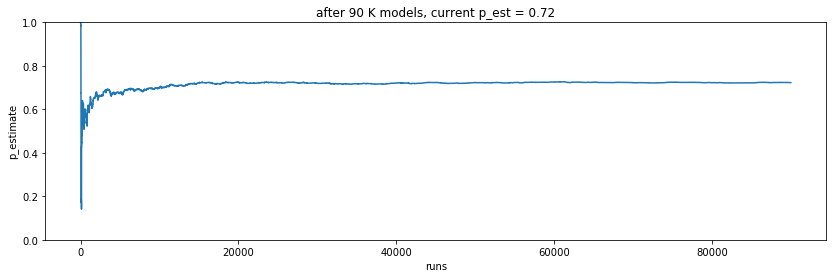

In [18]:
from random import random
from scipy.stats import multinomial
from matplotlib import pyplot as plt
from IPython.display import clear_output
%matplotlib inline

data = {
    'Carriage':  2,
    'Talabat':   2,
    'UberEats':  16,
    'Deliveroo': 12,
}

n_models = 100*1000

def random_model(k):
    ps = [random() for _ in range(k)]
    s = sum(ps)
    return [p/s for p in ps]

def random_simulation(ps, n):
    return list(multinomial(n, ps))

def same_as_data(outcome):
    return all([i == j for  (i, j) in zip(outcome, list(data.values()))])

def model_satisfies_hypothesis(ps):
    return max(ps) == ps[2] # UberEats

hits_total = 0
hits_hypothesis = 0
num_model_satisfies_hypothesis = 0
p_estimation_progress = []
for i in range(n_models):
    model = random_model(len(data.keys()))
    hits = multinomial(sum(data.values()), model).pmf(list(data.values()))
    hits_total += hits
    if model_satisfies_hypothesis(model):
        hits_hypothesis += hits
        num_model_satisfies_hypothesis += 1   
    if hits_total > 0:
        p_hypothesis_given_data = hits_hypothesis/hits_total
        p_estimation_progress.append(p_hypothesis_given_data)
        if i % 10000 == 0:
            clear_output()
            plt.figure(figsize=(14, 4))
            plt.xlabel('runs')
            plt.ylabel('p_estimate')
            plt.ylim((0, 1))
            plt.title('after %d K models, current p_est = %.2f' % (i/1000, p_hypothesis_given_data))
            plt.plot(p_estimation_progress)
            plt.show()

p_hypothesis_given_data = hits_hypothesis/hits_total

In [19]:
print(p_hypothesis_given_data)

0.7267426893920188
